## A Glimpse of Machine Learning in Finances
#### By David Thompson and Ali Raisolsadat

In the world of finances, accounting and financial ratios are very important. They tells us how a company is doing in general and will it, in future be profitable to an investor. However, the meaning of some of these ratios are open to interpretation and they can be unwary by giving false information to an investor. Therefore, a much more rigorous analysis is required to optimize a portfolio that is risk averse.

In this project we like to examine how we can use only the raw accounting information from companies to make investing decisions. We look at financial indicators (accounting information) of nearly 4000 companies in NYSE (New York Stock Exchange). We will create a portfolio of the healthy companies to minimize our risk, and then use this portfolio to estimate a yearly return on a similar portfolio. 

We begin with fundamental ideas here with our notebook and in the paper we will view them more carefully and more in depth.


### Data
The following is a summary analysis of the data we used for this assignment:
* The data was taken from Kaggle website.
* The  folder that was downloaded had 5 years of data. That is 5 ".csv" files (2014-2018), each containing nearly to list of 4000 companies that are publicly traded on NYSE, and their yearly accounting information.
* Putting together this data is very hard.
* Due to how hard it must have been for the person gathering this information, and how companies redact certain information from their public statements for legal reasons, we did encounter discrepancies in our training examples. 
* We overcame this by getting rid of companies that did not provide full information. As an investor, we prefer to have access to as much as information.

### Our Approach and Models
We have devised two models for this project. There will be a description of our approach, comments along the way to address why we get a certain result, and at the end there will be a description about our model's final result.

One model considers the health of companies and the other tries to predict the future returns on the stock of the healthy companies. In our first model we used K clustering to decide which of the companies provided are healthy or not healthy. We created different clusters that contained certain number of stocks, and we took the "best" clusters to create a portfolio of healthy companies. In our second model, we took an example of 5 companies from our list of healthy companies and tried to predict their yearly returns. However we hit a road block as we did not have enough data instances to move forward with our return predictions. With all the preliminaries introduced, let us dive into the project and see the results.

#### First Model
Since we had many training examples, BUT no labels, we decided to use a clustering method. We used K-Means algorithm to create our final master portfolio. What follows is how to get our optimum portfolio, that is, healthy companies between years 2014-2018.

Before we begin creating our clusters, let us see what value of K parameter is the best option for us. We will use the "elbow method" to find the best K value. The algorithm presented in class, was to loop through each K value iteratively and calculate the cost function. We then graph these values, and where there is an "elbow" we choose our K to be the tip of that elbow. 

Our goal was to accept 2 sensible K values and use them for our clustering script. 
* We began by importing our data.
* We then created two data frames. Since our data contains very large numbers, then it is a good idea to normalize before we proceed with our elbow method.
    * One data frame will only contain our raw normalized features.
    * The second data frame will have both our raw features and 6 financial ratios.
* We then ran our iterative loop for K values for both dataframes, saved the K and their corresponding cost values and created a plot to represent them.

Keep in mind that we will only normalize the data for the elbow method. We will use the raw data instances for the K clusters. Let us see the results.

In [1]:
# Import the pacakges we need for this script.
from pandas_datareader import data
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #this is used for plot styling


# Begin by reading the original data.
df1 = pd.read_csv("2018_Financial_Data.csv")

# Create the financial data frame with features taken directly from the real data (df1).
# These features are also included in evaluating ratios but we start by using the raw values.
financial_data = pd.DataFrame(df1, columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']) 

# Get rid of empty values from the date given. Notice that this will decrease our training exmamples by almost half.
nan_value = float("NaN")
financial_data.replace("", nan_value, inplace=True) #change empty data to nan
financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data.dropna(axis=0, inplace = True) #get rid of nans

# Let us see how data looks like
display(financial_data)

# Drop the symbols. If we keep the symbols then KMeans will not work since they are strings.
financial_data = financial_data.drop('Symbol', 1)

# Normalize the financial data.
# Each feature is in large dollar values, whereas some have variance. We are also going to add the ratios later. Therefore it 
# is a good idea to normalize the data before we do our clustering.
financial_data_norm = pd.DataFrame(preprocessing.normalize(financial_data))
financial_data_norm.columns = ['Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities']

,Symbol,Revenue,Revenue Growth,Gross Profit,Operating Income,Earnings before Tax,Free Cash Flow,Net Income,Total current assets,Operating Expenses,Net Debt,Short-term debt,Long-term debt,Total shareholders equity,Weighted Average Shs Out,Total current liabilities,Total debt,Total liabilities
0,CMCSA,9.450700e+10,0.1115,9.450700e+10,1.900900e+10,1.511100e+10,1.198500e+10,1.173100e+10,2.184800e+10,7.549800e+10,1.080000e+11,4.398000e+09,1.070000e+11,7.161300e+10,4.549505e+09,2.760300e+10,1.120000e+11,1.790000e+11
1,KMI,1.414400e+10,0.0320,6.856000e+09,3.794000e+09,2.196000e+09,2.119000e+09,1.609000e+09,5.722000e+09,3.062000e+09,3.404400e+10,3.388000e+09,3.393600e+10,3.367800e+10,2.207018e+09,7.557000e+09,3.732400e+10,4.366900e+10
2,INTC,7.084800e+10,0.1289,4.373700e+10,2.331600e+10,2.331700e+10,1.425100e+10,2.105300e+10,2.878700e+10,2.042100e+10,1.470900e+10,1.261000e+09,2.509800e+10,7.456300e+10,4.564000e+09,1.662600e+10,2.635900e+10,5.340000e+10
3,MU,3.039100e+10,0.4955,1.789100e+10,1.499400e+10,1.430300e+10,8.521000e+09,1.413500e+10,1.603900e+10,2.897000e+09,-2.163000e+09,8.590000e+08,3.780000e+09,3.229400e+10,1.159811e+09,5.754000e+09,4.639000e+09,1.011200e+10
5,BAC,9.124700e+10,0.0446,9.124700e+10,3.786600e+10,3.458400e+10,3.952000e+10,2.814700e+10,7.790000e+11,5.338100e+10,-4.440000e+11,3.797500e+10,2.290000e+11,2.650000e+11,9.814197e+09,1.890000e+12,4.370000e+11,2.090000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,WINA,7.251110e+07,0.0395,6.784070e+07,4.180240e+07,3.928310e+07,1.113870e+07,3.012550e+07,2.425130e+07,2.603830e+07,7.717500e+06,3.236100e+06,2.560490e+07,-4.808500e+06,3.901202e+06,1.248330e+07,2.884100e+07,5.147160e+07
4376,WINS,1.519838e+07,-0.3527,1.496750e+07,9.460981e+06,9.460981e+06,6.499370e+06,1.049988e+07,1.296404e+08,5.506514e+06,-5.380500e+06,1.772799e+07,1.847100e+07,2.742776e+08,1.983764e+07,2.225103e+07,1.847108e+07,3.494703e+07
4382,WVVI,2.307974e+07,0.1068,1.478150e+07,4.182715e+06,3.939586e+06,-2.959752e+06,2.858580e+06,2.863433e+07,1.059878e+07,-1.383677e+06,2.102474e+06,6.251316e+06,4.756027e+07,4.964529e+06,5.395262e+06,8.353790e+06,1.392227e+07
4385,XELB,3.546600e+07,0.1186,3.276400e+07,3.930000e+06,2.919000e+06,5.117000e+06,1.088000e+06,2.387500e+07,2.883400e+07,1.073800e+07,8.275000e+06,1.130000e+07,9.988200e+07,1.828454e+07,1.611600e+07,1.957500e+07,3.817700e+07


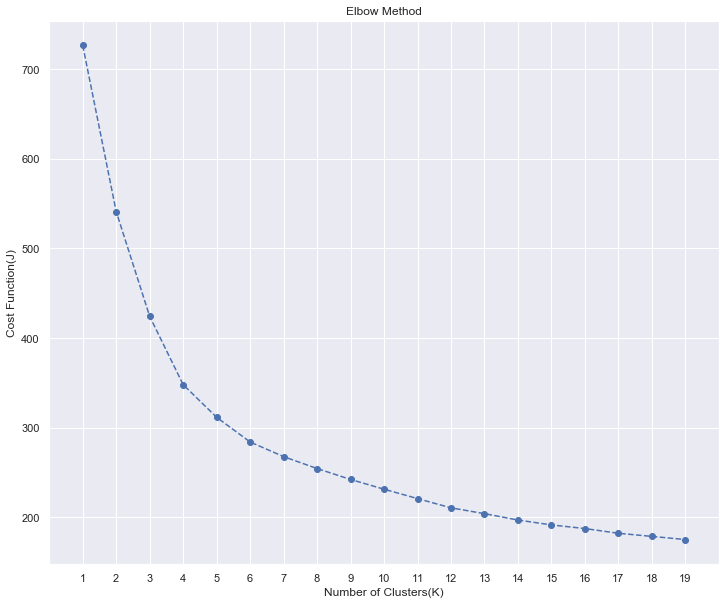

Cost value is:  347.93608596908007  at K = 4.


In [5]:
# Initialize the score values array and number of clusters for out loop. We used a range of 20 clusters. This should be 
# enough to give us an "elbow"
cost = [0]*19
clusters = range(1, 20)

# Create the iterative loop for changing K values
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters and the normailized data.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :]) 

    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()

print("Cost value is: ", cost[3], " at K = 4.") #possible elbow

We have a hard time finding our elbow. If we look really closely we can find an elbow near $K=3$ and $K=4$, but we are not too sure about these values. Now let add the financial ratios and see if they help us find a good K value.

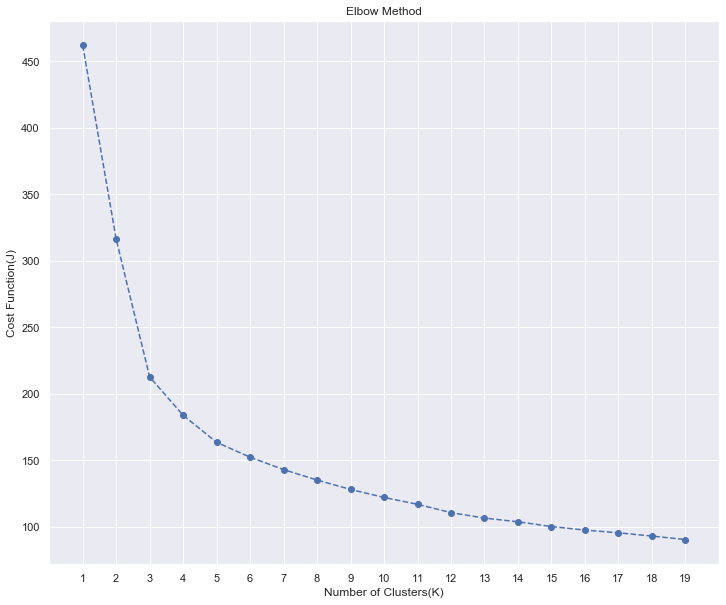

Cost value is:  212.65952500848374  at K = 3.


In [6]:
# We add the ratios to the original financial data, and then normalize. Same procedure as above.
# Calculate earnings per share ratio
financial_data['EarningsPerShare', ] = (df1['Net Income'] - df1['Preferred Dividends']) / df1['Weighted Average Shs Out']

# Get the P/E ratio directly from data
financial_data['PriceEarningsRatio'] = df1['PE ratio']

# Calculate debt to equity ratio
financial_data['DebtEquityRatio'] = (df1['Short-term debt'] + df1['Long-term debt']) / df1['Total shareholders equity']

# Get the return on equity ratio
financial_data['ReturnOnEquity'] = df1['returnOnEquity']

# Get the quick ratio
financial_data['QuickRatio'] = df1['quickRatio']

# Calculate the working capital ratio
financial_data['WorkingCapitalRatio'] = df1['Total current assets'] / df1['Total current liabilities']


nan_value = float("NaN")
financial_data.replace("", nan_value, inplace=True) #change empty data to nan
financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
financial_data.dropna(axis=0, inplace = True) #get rid of nans
financial_data_norm = pd.DataFrame(preprocessing.normalize(financial_data))
financial_data_norm.columns = ['Revenue', 'Revenue Growth', 'Gross Profit', 
                                              'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                              'Net Income', 'Total current assets',
                                              'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                              'Total shareholders equity', 'Weighted Average Shs Out', 
                                              'Total current liabilities', 'Total debt', 'Total liabilities',
                                              'EarningsPerShare', 'PriceEarningsRatio', 'DebtEquityRatio',
                                              'ReturnOnEquity', 'QuickRatio', 'WorkingCapitalRatio']

cost = [0]*19
clusters = range(1, 20)
for k in range(1, 20):
 
    # Create a kmeans model on our data, using k clusters and the normailized data.
    kmeans_model = KMeans(n_clusters = k, random_state = None).fit(financial_data_norm.iloc[:, :])
    # These are our fitted labels for clusters.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center.
    distance = kmeans_model.inertia_
    cost[k-1] = distance

# Show the plot with the "elbow"
plt.figure(figsize=(12, 10))
plt.plot(clusters, cost, '--bo')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Cost Function(J)')
plt.title('Elbow Method')
plt.xlim(0, 20)
plt.show()


print("Cost value is: ", cost[2], " at K = 3.") #possible elbow

Eurika! The ratios helped us to find a nice elbow. It seems that they are not completely useless. We will not use them moving forward, but if you have paid close attention, we have features that encapsulate these ratios.

We begin using the $K$ values that we found from our elbow method and use it on our data. We found that if we use 
$K = 4$ and $K = 5$ we can get good clusters from the data given to us. We can also use $K=3$ but we need to bring the amount of risk as low as possible. In other words we like to be risk averse, even in finding the healthy companies.

We do this year by year. Every year will give us 9 clusters. 
That means we will have 4 clusters when $K=4$ and 5 when $K=5$. Each cluster will present companies that are healthy, semi-healthy, not healthy and very unhealthy.

Now the question will be how do we choose the best cluster from different $K$ values. We have high dimension data ($>$3D), so we cannot examine them visually. Therefore we need to use a feature as an indicator that belongs to a healthy company. We know that a good company has high revenues. High revenue indicates that a company is managing its wealth very well, has a good marketing department, and is able to pay outstanding debt at the end of the year. We could use net income as well, but there are some issues with using only net income. We will further discuss these issues in the project paper.

High revenue however, does not mean a company is healthy, as we are ACTUALLY trying to find the healthy companies using clustering. It only means that a company's stock will be higher at the end of the year, since there is more demand for the stock as this is highly correlated with high revenue. These will be our "healthy" stocks.

Note: Another good measure will be using "Gross profit", specially if an investor is looking for a high dividends return.  

We will do this by creating a loop to get us each year's group of healthy stocks. This loop cycles through each year collecting the best group of stocks then eventually creates a master portfolio from all of the groups combined.

In [7]:
# Import the libraries we need for this project
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Begin by reading the original data
df2018 = pd.read_csv("2018_Financial_Data.csv")
df2017 = pd.read_csv("2017_Financial_Data.csv")
df2016 = pd.read_csv("2016_Financial_Data.csv")
df2015 = pd.read_csv("2015_Financial_Data.csv")
df2014 = pd.read_csv("2014_Financial_Data.csv")

# Insert data into list for iteration and initialize list to contain each year's groups
list_years = [df2018, df2017, df2016, df2015, df2014]
finalPortfolio_list = []

for j in range (0, len(list_years)):
    # Create the financial data frame we need with extra features taken directly from the real data (df)
    financial_data = pd.DataFrame(list_years[j], columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                                  'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                                  'Net Income', 'Total current assets',
                                                  'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                                  'Total shareholders equity', 'Weighted Average Shs Out', 
                                                  'Total current liabilities', 'Total debt', 'Total liabilities']) 

    # Get rid of empty values from the date given
    nan_value = float("NaN")
    financial_data.replace("", nan_value, inplace=True) #change empty data to nan
    financial_data.replace(0, nan_value, inplace=True) #change zero data to nan
    financial_data.dropna(axis=0, inplace = True) #get rid of nans

    # Save the original data frame as target data frame
    target_data = financial_data

    # Drop the symbols for KMeans
    financial_data = financial_data.drop('Symbol', 1)

    # KMeans algorithm starts here
    kmeans = KMeans(n_clusters = 4,  random_state=None) # There is a difference of 1 company depending on the state chosen
    kmeans.fit(financial_data)
    y_k4means = kmeans.predict(financial_data)

    kmeans = KMeans(n_clusters = 5,  random_state=None)
    kmeans.fit(financial_data)
    y_k5means = kmeans.predict(financial_data)

    # This loop finds the average "Revenue" of each cluster (using 2 different cluster sizes)
    # It then indentifies the largest average and its associated cluster
    # The output are the companies within these "top" clusters
    largestMean_k4 = 0
    largestMean_k5 = 0
    for i in range(5):
        nportfolio_k5 = pd.DataFrame(target_data.loc[y_k5means == i, 'Revenue']).to_numpy()
        mean_k5 = nportfolio_k5.mean()
        if mean_k5 > largestMean_k5:
            largestMean_k5 = mean_k5
            cl_num_k5 = i 

        if i < 4:
            nportfolio_k4 = pd.DataFrame(target_data.loc[y_k4means == i, 'Revenue']).to_numpy()
            mean_k4 = nportfolio_k4.mean()
        if mean_k4 > largestMean_k4:
            largestMean_k4 = mean_k4
            cl_num_k4 = i

    # Find the cluster with highest average revnue and let that cluster be the "best" one from the others
    nportfolio_k5 = pd.DataFrame(target_data.loc[y_k5means == cl_num_k5, 'Symbol'])
    nportfolio_k4 = pd.DataFrame(target_data.loc[y_k4means == cl_num_k4, 'Symbol'])

    # Put these clusters in the group of best stocks
    tempPortfolio = nportfolio_k4.append(nportfolio_k5, ignore_index = True)
    tempPortfolio = tempPortfolio.drop_duplicates(subset = 'Symbol', keep = 'first') #get rid of duplicates

    finalPortfolio_list.append(tempPortfolio) #start creating our final portfolio
    if j == 0:
        finalPortfolio = tempPortfolio
    else:
        finalPortfolio = finalPortfolio.append(tempPortfolio, ignore_index = True)
# Create Master Portfolio of the most healthy stocks
master_portfolio = finalPortfolio.drop_duplicates(subset = 'Symbol', keep = 'first')

NOTE: To view results, uncomment appropriate year below.

In [8]:
#display(finalPortfolio_list[0])
#print("Year: 2018")

#display(finalPortfolio_list[1])
#print("Year: 2017")

#display(finalPortfolio_list[2])
#print("Year: 2016")

#display(finalPortfolio_list[3])
#print("Year: 2015")

#display(finalPortfolio_list[4])
#print("Year: 2014")

display(master_portfolio)

,Symbol
0,CMCSA
1,AAPL
2,MSFT
3,F
4,AIG
5,T
6,BBD
7,XOM
8,GM
9,VZ


So of 2000 companies from which we had "usable" information, we were able to generate 35+ stocks for our final portfolio depending on the random state. This number is low, but we can say that these companies will are healtheir than the other. It does not mean that we definitely will have a positive return on our investments, but there is a higher chance that we will, and certainly higher chance than a company that has not been healthy in several years.

### Second Model
We already saw how K-Means perform, and we were able to get a portfolio of healthy companies. Now the question is what can we do with these stocks?
As an investor we are interested on how much return we will have if we buy these stocks, and sell them after a period of time (buy-and hold portfolio). So a logic step will be to create a model so it can predict the return on our portfolio.

In this model we used a multiple uni-variate regression to predict the amount of returns on each stock. We began by importing "pandas_datareader" libraries. These libraries permitted us to import stock information, such as closing and opening prices. This is not a default library, therefore you may need to pip install them through Anaconda command line. 
For example, let us see look TD bank's stock information for month of February this year:

In [9]:
start_date = '2020-02-01'
end_date = '2020-02-29'
february_info = data.DataReader('TD', 'yahoo', start_date, end_date)
display(february_info)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-03,55.700001,54.980000,55.220001,54.990002,920700,54.990002
2020-02-04,56.349998,55.470001,55.470001,56.040001,1020700,56.040001
2020-02-05,56.750000,56.279999,56.450001,56.599998,992800,56.599998
2020-02-06,57.009998,56.650002,56.869999,56.930000,596100,56.930000
2020-02-07,57.099998,56.630001,56.770000,56.980000,896900,56.980000
2020-02-10,56.900002,56.599998,56.660000,56.779999,1327000,56.779999
2020-02-11,57.209999,56.820000,57.000000,56.919998,1133300,56.919998
2020-02-12,57.169998,56.770000,57.139999,56.840000,2181200,56.840000
2020-02-13,56.820000,56.349998,56.700001,56.520000,1433700,56.520000


Now that we have access to stock information, we can actually calculate yearly historical returns for our portfolio. That can be done using the formula:

$$Total Stock Return = \frac{(P_{1} - P_{0}) + Dividends}{P_{0}}$$

where $P_{0}$ is the initial price of the stock, $P_{1}$ is the ending price of the stock (after 1 period) and dividends are a company's compensation for their shareholders. Since we do not have access to amount of dividends we can use adjusted close price, which the ending price for a period after all the accounting for any corporate actions. This is widely used for historical returns for a stock. We will talk about how we can add the dividends into our model in the project paper.

So our new equation becomes
$$Total Stock Return = \frac{AP_{1} - P_{0}}{P_{0}}$$

where $AP_{1}$ is the adjusted close price after 1 period.


We have all our formulas set. Let us discuss how we are going to create our model:
* Since we are a small investor we begin by selecting 5 stocks from our master portfolio.
* Then we calculate their yearly historical returns. These are our target data. If we do any predictions, we will compare them to these values to reflect on our accuracy of the model.
* We will get the features for these 5 stocks from all 5 years. We will use the same features we used in the K-Means model for simplicity. 
* We now have a 5 matrices (using 5 stocks) of 5 training examples (using 5 years of data), and 5 matrices of target predictions.
* We use normal equation below to solve for the parameters of the multiple linear regression:
$$\theta = (X^{T}X)^{-1}X^{T}y$$
* We use these parameters to predict our returns.
* We calculate our amount of error using root-square-mean-error(RMSE). This indicates how many standard deviations the predictions are from the true target values. The RMSE has the following form:
$$RMSE = \sqrt{\frac{\sum\limits_{i=1}^n(\hat y_{i} - y_{i})}{n}} $$

In [41]:
# Two telecommunication companies, two tech companies, and Walmart
hist_return = [] #empty list for historical returns.
tickers = ['CMCSA','T', 'AAPL', 'MSFT', 'WMT']

# Since these data requires to be imported, it may take few seconds to load. The rest run very fast!
start_date = '2014-01-01'
end_date = '2014-12-31'
for ticker in tickers:
    unit_cost = data.DataReader(ticker, 'yahoo', start_date)['Open'][0]
    adj_close = data.DataReader(ticker, 'yahoo', end_date)['Adj Close'][0]
    ticker_return = ((adj_close - unit_cost) / unit_cost)*100
    hist_return.append(ticker_return)
    
start_date = '2015-01-01'
end_date = '2015-12-31'
for ticker in tickers:
    unit_cost = data.DataReader(ticker, 'yahoo', start_date)['Open'][0]
    adj_close = data.DataReader(ticker, 'yahoo', end_date)['Adj Close'][0]
    ticker_return =  ((adj_close - unit_cost) / unit_cost)*100
    hist_return.append(ticker_return)
    
start_date = '2016-01-01'
end_date = '2016-12-30'
for ticker in tickers:
    unit_cost = data.DataReader(ticker, 'yahoo', start_date)['Open'][0]
    adj_close = data.DataReader(ticker, 'yahoo', end_date)['Adj Close'][0]
    ticker_return =  ((adj_close - unit_cost) / unit_cost)*100
    hist_return.append(ticker_return)
    
    
start_date = '2017-01-01'
end_date = '2017-12-29'
for ticker in tickers:
    unit_cost = data.DataReader(ticker, 'yahoo', start_date)['Open'][0]
    adj_close = data.DataReader(ticker, 'yahoo', end_date)['Adj Close'][0]
    ticker_return =  ((adj_close - unit_cost) / unit_cost)*100
    hist_return.append(ticker_return)
    
start_date = '2018-01-01'
end_date = '2018-12-31'
for ticker in tickers:
    unit_cost = data.DataReader(ticker, 'yahoo', start_date)['Open'][0]
    adj_close = data.DataReader(ticker, 'yahoo', end_date)['Adj Close'][0]
    ticker_return =  ((adj_close - unit_cost) / unit_cost)*100
    hist_return.append(ticker_return)

hist_return = np.array(hist_return)
years = [];
for i in range(2014, 2019):
    years.append(i)

returns_df = pd.DataFrame(hist_return.reshape(5,5), columns = tickers)
historicalPortReturn = sum(returns_df.sum(axis = 0)/5) #calculate historical portfolio return
returns_df['year'] = years
returns_df.name = 'HISTORICAL Returns'

In the following cell we create a list of stocks and compare each one to their data from 2018 to 2014. The data files are read in and stored in a list which is used in the first outer loop to get the significant features for comparison. The outer loop iterates through each year. The inner loop takes each stock from the selected year and adds it to its own list. It then takes the appropriate Expected Return values (calculated above) and appends them to each stock as a new column. Lastly, we convert these lists to data frames and store the data frames in another list titled datatables. To see results, the last two lines in the following cell may be uncommented.

In [42]:
# Read in all datasets
df2018 = pd.read_csv("2018_Financial_Data.csv")
df2017 = pd.read_csv("2017_Financial_Data.csv")
df2016 = pd.read_csv("2016_Financial_Data.csv")
df2015 = pd.read_csv("2015_Financial_Data.csv")
df2014 = pd.read_csv("2014_Financial_Data.csv")

# Insert data into list for iteration and initialize other lists
datatables = []
listtotal = []
list_stocks = []
list_years = [df2018, df2017, df2016, df2015, df2014]
for i in range(len(list_years)):
    
    # Clear list_stocks for the upcoming year
    if len(list_stocks)!=0:
        list_stocks.clear()
        
    # Modify data to get desired amount of features
    financial_data = pd.DataFrame(list_years[i], columns = ['Symbol', 'Revenue', 'Revenue Growth', 'Gross Profit', 
                                                  'Operating Income', 'Earnings before Tax', 'Free Cash Flow', 
                                                  'Net Income', 'Total current assets',
                                                  'Operating Expenses',  'Net Debt', 'Short-term debt', 'Long-term debt', 
                                                  'Total shareholders equity', 'Weighted Average Shs Out', 
                                                  'Total current liabilities', 'Total debt', 'Total liabilities']) 
    
    for j in range(len(tickers)):
        list_stocks.append(pd.DataFrame(financial_data.loc[financial_data['Symbol'] == tickers[j], :]))
        
        if i == 0:
            # Add stocks to their own list
            listtotal.append(list_stocks[j])
            
        elif i == (len(list_years)-1):
            listtotal[j] = listtotal[j].append(list_stocks[j]) # Append stock data together throughout 5 years
            
            # Add on Expected Return column to each stock
            listtotal[j]['Expected Return'] = [hist_return[j],hist_return[j+len(tickers)], 
                                            hist_return[j+(2*len(tickers))], hist_return[j+(3*len(tickers))],
                                            hist_return[j+(4*len(tickers))]]
            
            datatables.append(pd.DataFrame(listtotal[j]))
            
        else:
            listtotal[j] = listtotal[j].append(list_stocks[j])
            
#for k in range(0, len(datatables)):
    #display(datatables[k])

In this cell we use multiple regression on our results. First we find the X and Y matrices for the normal equation, then we calculate the best paramters for our regression model. We then evaluate the amount of error between our predictions and real returns using the RMSE.

In [43]:
# Loop through each of the tables and calculate the pararmeters for multiple linear regression 
# After calculating the parameters, test the regression and calcualte RMSE
expected_return = []
error = []
param_theta_apple = []
for i in range(0, len(datatables)):
    
    # Find what are the X and Y matrices for normal equation
    x = datatables[i].drop('Symbol',1)
    x = x.drop('Expected Return', 1).to_numpy()
    y = datatables[i]['Expected Return'].to_numpy()
    
    # Calculate the parameters
    XTX = np.dot(x.transpose(),x)
    XTX_inverse = inv(XTX)
    XTX_inverse_X = np.dot(XTX_inverse, x.transpose())
    param_theta = np.dot(XTX_inverse_X, y)
    

    # Find RMSE for the model using the training data and targets we have
    error_sum = 0
    for j in range (0,5):
        y_pred = np.dot(param_theta, x[j])
        expected_return.append(y_pred)
        #print(y_pred) #==> see the predictions here
        pred_difference = y_pred - returns_df[tickers[i]][j]
        error_sum = error_sum + ((pred_difference**2) / 5)
    RMSE = math.sqrt(error_sum)
    error.append(RMSE)

In [46]:
expected_return = np.array(expected_return)

returns_pred = pd.DataFrame(expected_return.reshape(5,5), columns = tickers)
predictedPortReturn = sum(returns_pred.sum(axis = 0)/5) #calculate predicted portfolio return
returns_pred['year'] = years
returns_pred['RMSE'] = error
returns_pred.name = 'PREDICTED Returns'


print(returns_pred.name)
display(returns_pred)
print("The predicted return on our portfolio for years 2014-2018: ", predictedPortReturn)
print()
print(returns_df.name)
display(returns_df)
print("The historical return on our portfolio for years 2014-2018: ", historicalPortReturn)

PREDICTED Returns


,CMCSA,T,AAPL,MSFT,WMT,year,RMSE
0,11.531250,-5.093750,25.562500,16.156250,-12.375000,2014,7.109598
1,-59.556285,-60.224160,-34.707178,-41.399590,-41.148818,2015,30.806531
2,77.994347,11.976519,-8.720534,51.756857,18.154820,2016,29.072128
3,58.820363,15.020561,-47.501074,32.965628,27.529715,2017,33.209450
4,-16.030975,-47.928816,-5.483320,24.351925,-21.545435,2018,12.504246


The predicted return on our portfolio for years 2014-2018:  -5.978840368550079

HISTORICAL Returns


,CMCSA,T,AAPL,MSFT,WMT,year
0,1.705207,-28.388810,27.456902,11.344808,-3.731348,2014
1,-10.146865,-18.620589,-11.904417,9.353252,-35.554956,2015
2,18.108101,4.171407,7.569124,8.095585,6.627371,2016
3,9.813918,-20.169875,41.511218,31.603032,36.547809,2017
4,-18.278692,-32.165617,-8.887455,15.891587,-8.055473,2018


The historical return on our portfolio for years 2014-2018:  6.779045025750397


In short, the RMSE values are very large (more will be discussed in paper). This is due to small amount of training examples. We only have access to one year of financial data through the base data set. We can look into alternative models but at the end we will have the same problem. However it is intereting to see that the model tends to follow positive or negative returns on predictions with respect to the historical returns. Unfortunatley this is not enough for the return on our final portfolio returns as it is evident by the numbers represented. A risk averse investor and with this, we cannot make certain predictions this way. We need access to more data instances, i.e. quarterly or monthly data.

### Conclusion 
At the end we saw that we were able to distinguish between healthy and unhealthy companies by only using raw financial data. This will bring down the risk of misinterpreting the financial ratios, specially for a beginner investor. We also saw that un-variate regression is not a good model to predict the future yearly returns on stock due to lack of training examples, which also results on an excess amount of overfitting. 
However this is a glimpse of what an investor can achieve, if she decides to utilize the machine learning in finances. With a little extra data and time, we can create portfolios that can optimize the risk more than so we have here and create models that handles our investment portfolio without us losing a night sleep over fear of losing our investments.